# Customer Segmentation and Clustering (Unsupervised Learning)

In [5]:
# import image module
from IPython.display import Image
  
# get the image
Image(url="https://analyticsindiamag.com/customer-segmentation-whats-right/customer-segmentation-modeling-2/",width=1200, height=15)

# What is customer segmentation?

It is the process of dividing customers into various groups based on various factors that include demographics, salary, age etc.
This is done so that the marketing team can plan the marketing strategy accordingly for each group

# What is Unsupervised Learning

Unsupervised learning is the training of a machine using information that is neither classified nor labeled and allowing the algorithm to act on that information without guidance. Here the task of the machine is to group unsorted information according to similarities, patterns, and differences without any prior training of data. 

Unlike supervised learning, no teacher is provided that means no training will be given to the machine. Therefore the machine is restricted to find the hidden structure in unlabeled data by itself. 

# Problem Statement

Understand the target customers for the marketing team to plan strategy

# Context

a) To identify the most important shopping groups based on

1) Income

2) Age

3) Shopping Score

b) Identify the ideal number of groups with a label for each

# Approach

1) Perform EDA

2) Use KMeans Cluttering Algorithm to create segments

3) Use Summary Statistics on the clusters

# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Dataset Uploading

In [2]:
df = pd.read_csv('Mall_Customers.csv')

# Exploratory Data Analysis

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


The standard deviation of the Age column is approximately 13.97. This suggests that the ages of the customers in the dataset vary by around 13.97 years on average from the mean age of 38.85. This indicates a moderate amount of variability in age.

The standard deviation of the Annual Income column is approximately $26.26k. This means that the annual incomes of the customers in the dataset vary by around $26.26k on average from the mean income of $60.56k. This indicates a moderate amount of variability in annual income.

The standard deviation of the Spending Score column is approximately 25.82. This indicates that the spending scores of the customers in the dataset vary by around 25.82 points on average from the mean score of 50.20. This suggests a moderate amount of variability in spending behavior.

Percentiles are statistical measures that divide a dataset into equal parts based on the rank or order of the values. The 25th, 50th (also known as the median), and 75th percentiles are commonly used to understand the distribution and spread of the data. Here's a breakdown of each percentile:

25th Percentile (25%): This value represents the point below which 25% of the observations in the dataset fall. In other words, it is the value below which the lower 25% of the data lies. It provides insight into the lower range of values. For example, the 25th percentile of the Age column is 28.75, meaning that 25% of the customers in the dataset have an age of 28.75 or below.

50th Percentile (50% or Median): This value represents the midpoint of the dataset, where half of the observations are above and half are below. It is a measure of central tendency and provides insight into the typical or average value. In the table you provided, the 50th percentile (median) of the Age column is 36, indicating that 50% of the customers have an age of 36 or below.

75th Percentile (75%): This value represents the point below which 75% of the observations in the dataset fall. It indicates the upper range of values and provides insight into the higher quartile. For example, the 75th percentile of the Age column is 49, meaning that 75% of the customers have an age of 49 or below.

By examining the percentiles, you can gain an understanding of the distribution and spread of the data. For instance, if there is a large difference between the 25th and 75th percentiles, it suggests a wider spread of values. On the other hand, if the 25th, 50th, and 75th percentiles are relatively close together, it indicates a more concentrated distribution.

In [45]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

# Univariate Analysis

# Histogram Plot (sample)

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

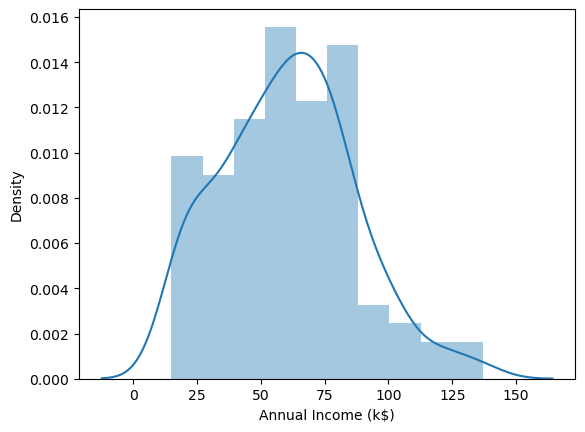

In [7]:
sns.distplot(df['Annual Income (k$)'])

# Histogram Plot

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
col = ['Age', 'Annual Income (k$)','Spending Score (1-100)']

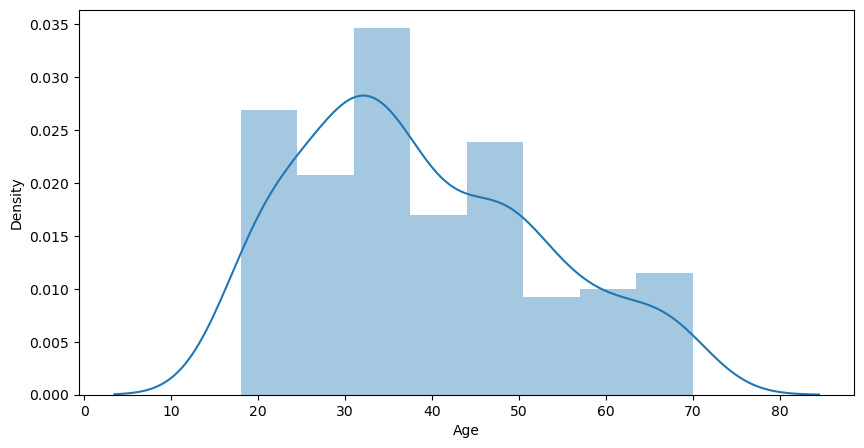

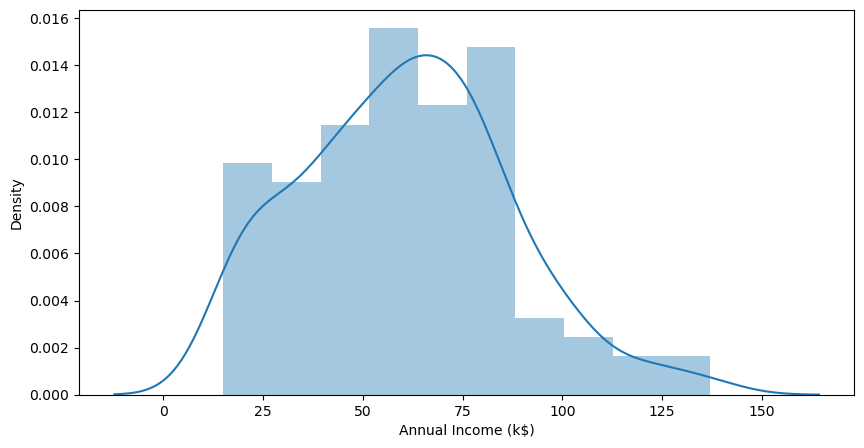

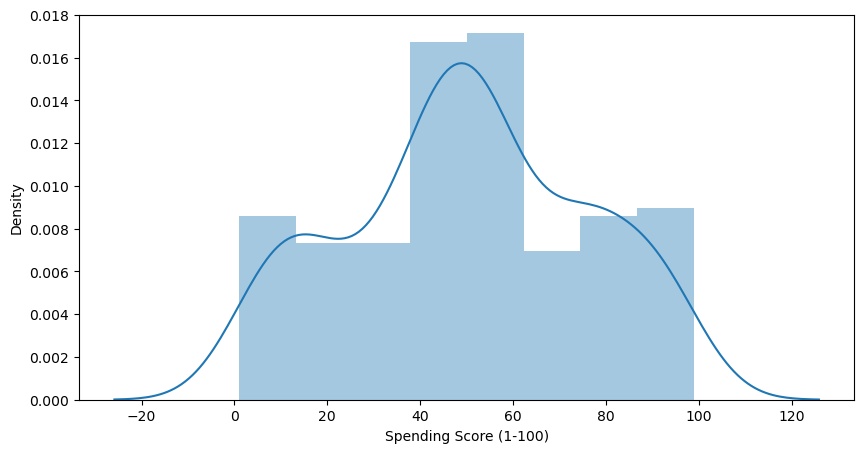

In [14]:
for i in col:
    plt.figure(figsize = (10,5))
    sns.distplot(df[i])

# Observations

# Use of Histogram Plot

Histograms are particularly useful for understanding the shape of the data distribution. It shows how frequently every value in a data set occurs in a relatively unbiased way and make it easy to see which values are most common and which values are least common. In a histogram, the type of data being measured is represented on the horizontal axis, and the vertical axis represents how many observations are in each bin.


The height of each bar represents the number of values in the data set that fall within a particular bin.

When the y-axis is labeled as "frequency" or "density", the numbers along the y-axis tend to be 0 to 1.0, or 0 to 100%. The height of each bar represents the probabilities of values falling within each bin.

Histogram helps in answering below questions

1) Where is the center of the data?

2) What is the spread of the data? What is the range?

3) What is the shape of the data? For example, is it symmetric, skewed, uniform, or bimodal?

# Age

1) Most of the customers fall into the age group of 32-37 (as represented by the peak of the histogram plot)


2) The graph suggests that he data trails off to the right and has a longer right tail, the shape is said to be right-skewed


3) The mode of the age column is 32, which suggest that most people has age of 32

In [32]:
df['Age'].value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: Age, dtype: int64

# Annual Income

1) Most of the customers have salary within the range of 54k$ - 62.5k$

2) The graph suggests that he data trails off to the right and has a longer right tail, the shape is said to be right-skewed

3) The mode of the annula income 52k$ and 78k$

In [33]:
df['Annual Income (k$)'].value_counts()

54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: Annual Income (k$), Length: 64, dtype: int64

# Spending Score

In [34]:
df['Spending Score (1-100)'].value_counts()

42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: Spending Score (1-100), Length: 84, dtype: int64

1) Most of the customers have spending score within the range of 50 - 60 points

2) The graph indicates that the data is somewhat or more close to a normal distribution, which means the data points are equally distributed around the mean.

3) The mode of the spending score is 42 points. Most of the customers are given a score of 42 points

# KDE Plot (sample)

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

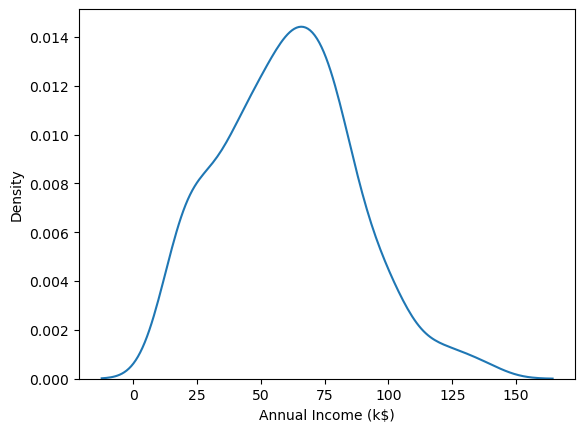

In [15]:
sns.kdeplot(df['Annual Income (k$)'])

# KDE Plot

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

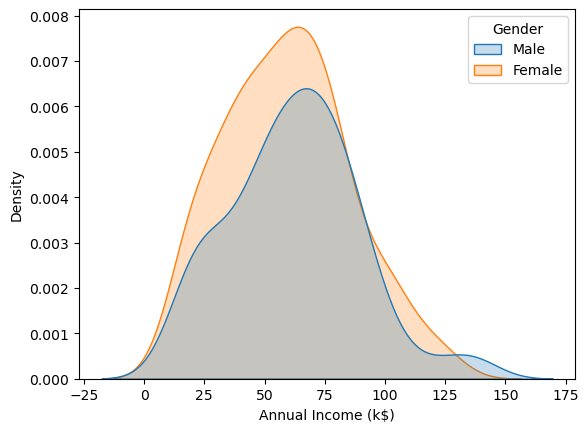

In [38]:
sns.kdeplot(data=df, x='Annual Income (k$)', shade=True, hue='Gender')

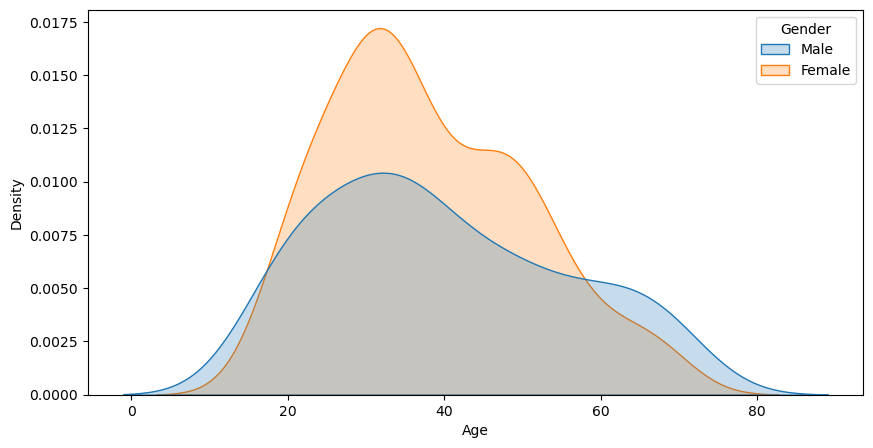

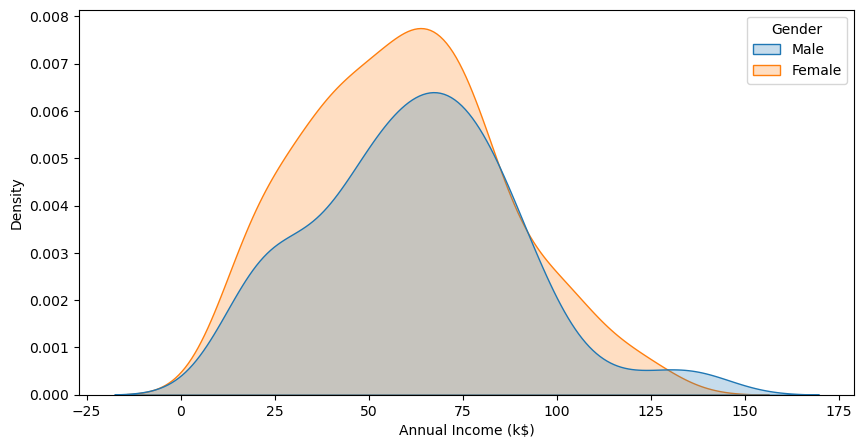

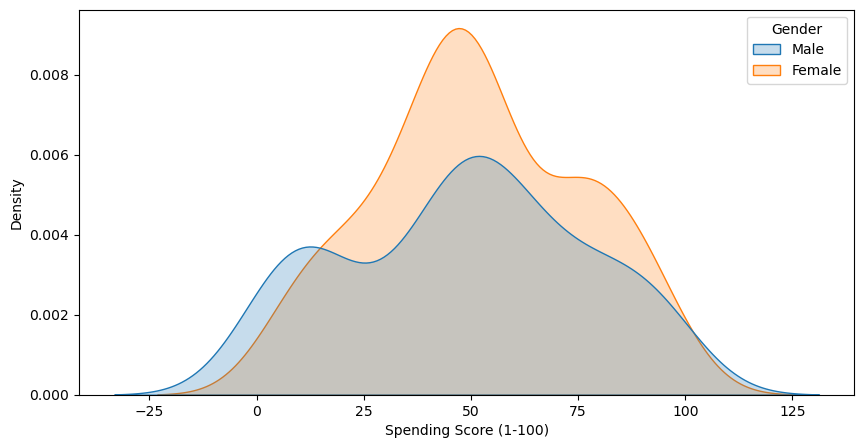

In [27]:
for i in col:
    plt.figure(figsize = (10,5))
    sns.kdeplot(data=df, x=df[i], shade=True, hue='Gender')

# Observations

# Use of KDE Plot

A KDE (Kernel Density Estimation) plot provides insights into the underlying distribution of a continuous variable. It is a smoothed representation of the data density, showing the probability density function (PDF) of the variable.

# Gender - Age Plot

1) Females age indicates a more pointed graph in a KDE plot which means, a higher peak or concentration of data points around a specific value of 32 years (precicesly). It suggests a greater density of observations occurring at or near that point.

2) Age plot of females are more right-skewed/positively skewed

3) Indicate that the outliers are present for the female-age plot

4) The broader curve of the Male-Age KDE plot indicates a higher variability or spread of the data. It suggests that the observations are more dispersed, covering a wider range of values. This implies that the data points are less concentrated around a central value or values.

5) Possibilities of outliers are high. Which we will confirm with the help of box plot further.

# Gender - Annual Income (k$)

1) Femal annual income indicates that, most women earn annual income of 62.5k$ (as indicated by the peak which is the mode or density of the population)

2) Annual income plot of females are more right-skewed/positively skewed

3) Annual income plot of males are also more right-skewed/positively skewed

4) The plot indicates that there are outliers present in the annual income plot for male. Which we will confirm with the help of box plot.

# Gender - Spending Score (1-100)

1) The spending score for females are more pointed graph in a KDE plot which means, a higher peak or concentration of data points around a specific value of 42 points (preceisely). It suggests a greater density of observations occurring at or near that point.

2) Possibilities of outliers are there for spending score for females

3) The KDE plot for spending score for males indicate that it is binodal. Which means that mostly they are given the score of 10 or 50 (precisely).

4) The plot indicates that there are outliers present in the spending score plot for male. Which we will confirm with the help of box plot.

# Box Plot

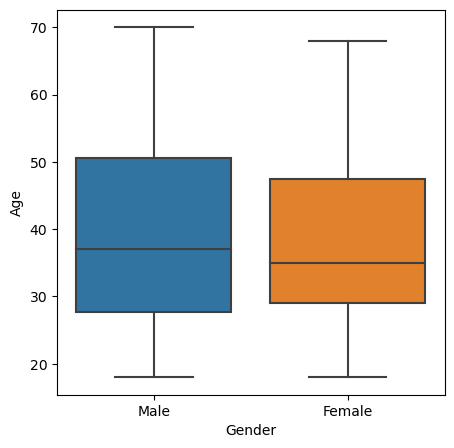

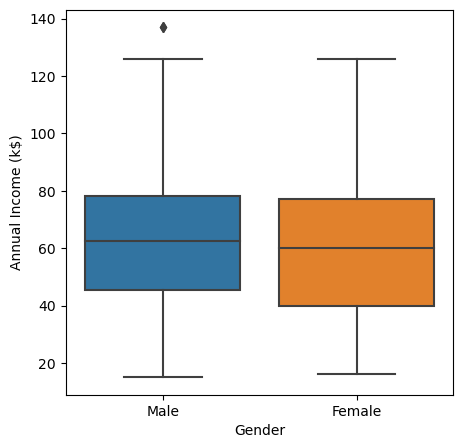

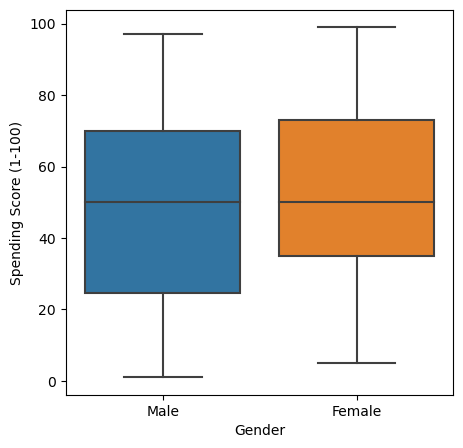

In [40]:
for i in col:
    plt.figure(figsize = (5,5))
    sns.boxplot(data = df, x = 'Gender', y = df[i])

# Observations

# Gender - Age Plot

1) Central tendency value (median) of male and females are as follows

Male - 38 years (approx)

Female - 35 years (approx)

2) Skeweness

Male 

Since the median is somewhat closer to the center of the box, the distribution is relatively symmetric. However, data is slightly skewed to the right as well.

Female

Data is skewed to the right

3) Spread or Variability

Since the boxplot of male's age is bigger in size when compared to the female's indicate that there is a greater spread of data or greater variability in the data within the interquartile range.

A smaller box indicates a smaller spread or lesser variability within the interquartile range.

# Gender - Annual Income (k$)

1) Central Tendency (median)

Male - 62k$ (approx)

Female - 60k$ (approx)

2) Skeweness

Both male and femal annual income plots are positively skewed

3) Spread or variability

Since the box plot for females are bigger in size compared to male's, it indicate that the spread or variability in the data within the interquartile range is more for female's

4) Outliers

The data points far away from the upward whisker in the box plot for male indicate the presence of outliers

# Gender - Spending Scores (1-100)

1) Central Tendency (median)

Male - 50 points

Female - 50 points

2) Skeweness

There is no much skeweness visible for both male and female. The disctribution seems to be more closer to a normal distribution.

3) Spread or Variability

Since the boxplot of male's age is bigger in size when compared to the female's indicate that there is a greater spread of data or greater variability in the data within the interquartile range.

A smaller box indicates a smaller spread or lesser variability within the interquartile range.

# To understand the distribution of 'Male' and 'Female'

In [46]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [47]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

# Scatter Plot

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

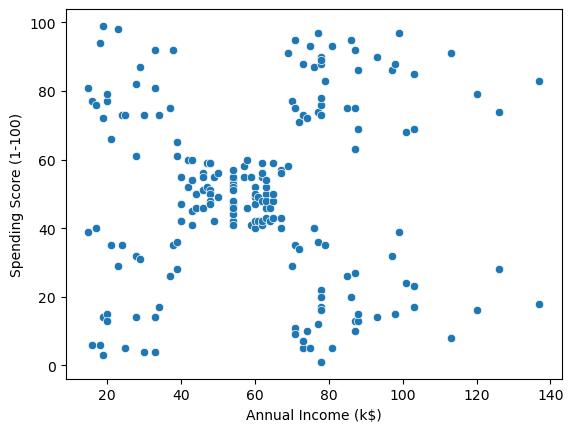

In [48]:
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)' )

# Observations

From the sample scatter plot of Annual Income and Spending Score we can see that there are formations of few clusters (5 clusters).

# Pairplot

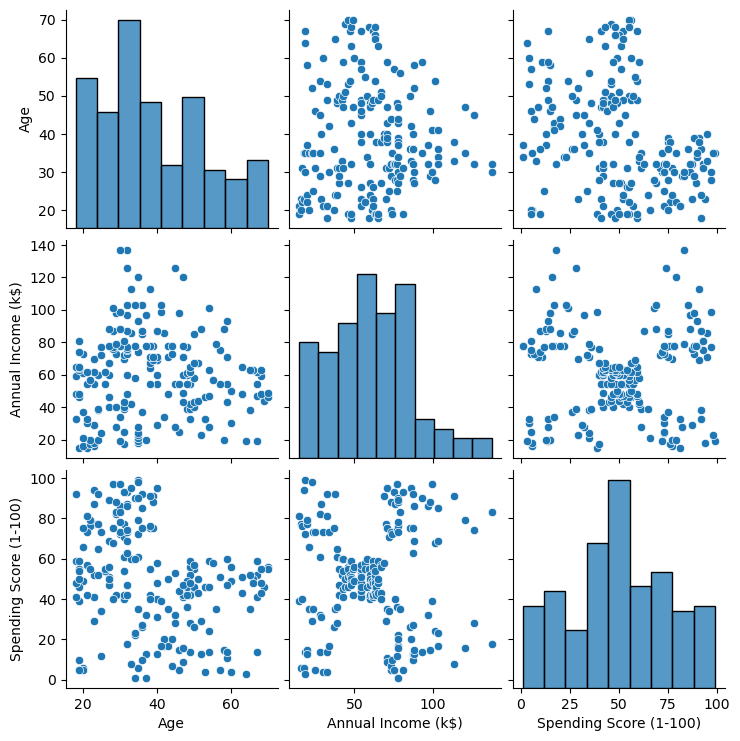

In [52]:
df = df.drop('CustomerID',axis = 1)
sns.pairplot(df)

# Observations

1) The plots are in matrix format where the row name represents x axis and column name represents the y axis. 

2) The main-diagonal subplots are the univariate histograms (distributions) for each attribute.

3) If we see a specific cluster formation is visible between Annual Income and Spending Score

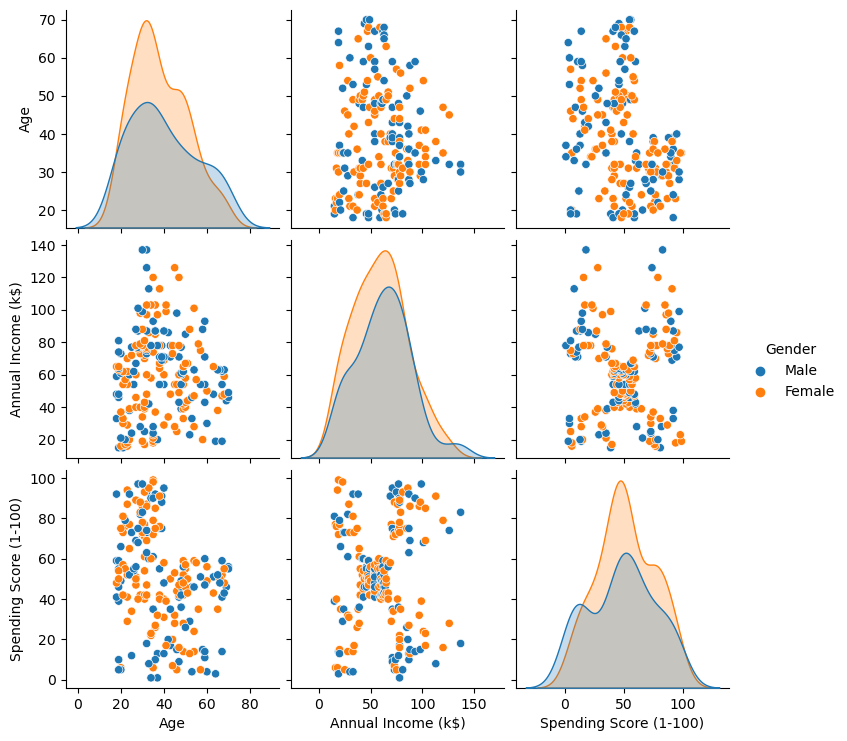

In [59]:
sns.pairplot(df, hue = 'Gender')

In [54]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [55]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

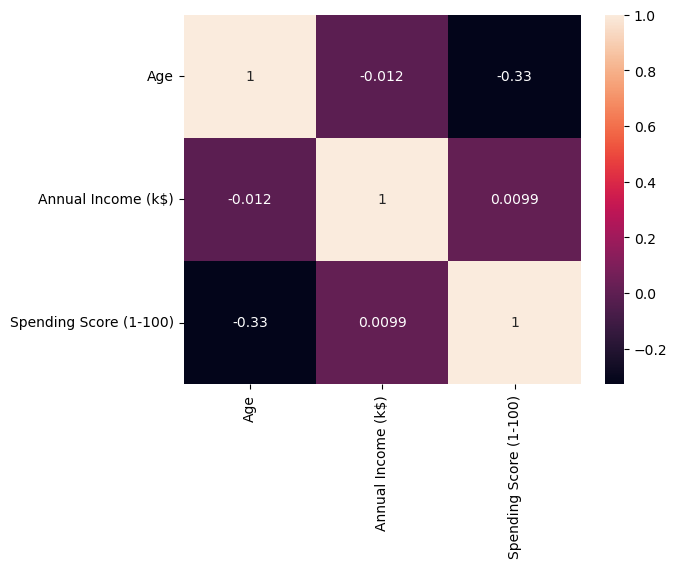

In [57]:
sns.heatmap(df.corr(),annot=True)

# Observations

High Negative correlation between below

1) Age - Annual Income

2) Age - Spending Score

Very weak positive correlation between below

1) Annual Income - Spending Score

# Clustering - Univariate, Bivariate & Multivariate

# Univariate Clustering

# Steps Involved

In sklearn there are 3 najor steps involved 

1) Initiate algorithm

2) Fit - Fitting the process by which the alogorithm learn the data

3) Predict or form labels out of that

# Algorithm Initiation

In [62]:
clustering1 = KMeans()

The number of clusters that will be formed by default will be 8 (from 0 to 7). This is represented by the n_clusters = 8 in the parameters of KMeans

KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')

# Fitting

In [64]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans()

In [65]:
clustering1.labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [67]:
df['Income Cluster'] = clustering1.labels_

In [68]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,4
1,Male,21,15,81,4
2,Female,20,16,6,4
3,Female,23,16,77,4
4,Female,31,17,40,4


In [70]:
df['Income Cluster'].value_counts()

1    40
5    36
4    32
6    28
0    26
3    18
7    14
2     6
Name: Income Cluster, dtype: int64

In [71]:
df.shape

(200, 5)

In [72]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

8 clusters are formed by default. Let say we wanted to identify the ideal number of clusters, then we can change the value in n_clusters = (mention the ideal number of clusters)

In [73]:
clustering1 = KMeans(n_clusters = 6)

In [74]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=6)

In [76]:
clustering1.labels_

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [77]:
df['Income Cluster (n=6)'] = clustering1.labels_

In [78]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income Cluster (n=6)
0,Male,19,15,39,4,5
1,Male,21,15,81,4,5
2,Female,20,16,6,4,5
3,Female,23,16,77,4,5
4,Female,31,17,40,4,5


In [80]:
df['Income Cluster (n=6)'].value_counts()

0    48
1    42
4    42
5    32
2    28
3     8
Name: Income Cluster (n=6), dtype: int64

We do not know what is the ideal number of clusters to be used. To determin the ideal number od clusters, we use a method called 'ELBOW METHOD'

Elbow Method

1) We vary the number of clusters from 1-10 ,ie, K=1 to K=10

2) We then cancluate the Within-Cluster-Sum of Square (WCSS) for each cluster created

3) WCSS will be the largest when K=1

4) As the number of clusters increases, the WCSS value will start to decrease. (inversely proportional)

5) When we plot the WCSS with the K value, the plot looks like an Elbow.

6) When we analyze the graph, we can see that the graph will rapidly change at a point and thus creating an elbow shape. 

7) From this point, the graph moves almost parallel to the X-axis. 

8) The K value corresponding to this point is the optimal value of K or an optimal number of clusters.

In [82]:
clustering1.inertia_

5050.9047619047615

In [84]:
inertia_scores = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [85]:
inertia_scores

[137277.28000000003,
 48660.88888888889,
 23517.330930930933,
 13278.112713472485,
 8481.49619047619,
 5050.9047619047615,
 3936.7968253968256,
 2836.339987789988,
 2208.812049062049,
 1734.1677489177491]

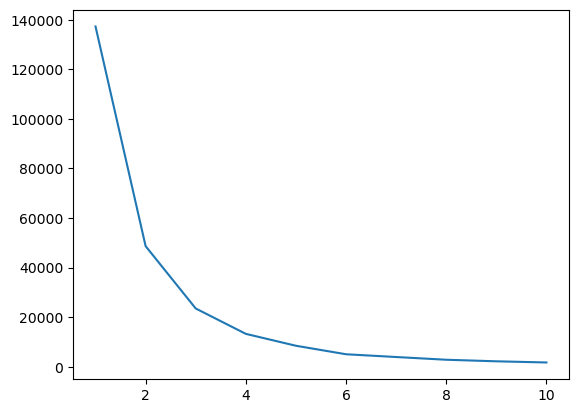

In [86]:
plt.plot(range(1,11),inertia_scores)

From the graph the elbow point, further which the graph will be parallel to x-axis starts at 3

In [89]:
clustering1 = KMeans(n_clusters = 3)

In [90]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [92]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [93]:
df['Income Cluster (n=3)'] = clustering1.labels_

In [94]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income Cluster (n=6),Income Cluster (n=3)
0,Male,19,15,39,4,5,0
1,Male,21,15,81,4,5,0
2,Female,20,16,6,4,5,0
3,Female,23,16,77,4,5,0
4,Female,31,17,40,4,5,0


In [95]:
df['Income Cluster (n=3)'].value_counts()

2    90
0    74
1    36
Name: Income Cluster (n=3), dtype: int64

# Observations (Univariate)

In [96]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Income Cluster (n=6)', 'Income Cluster (n=3)'],
      dtype='object')

In [97]:
df.groupby(['Income Cluster (n=3)'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster (n=3),,,
0,39.500000,33.486486,50.229730
1,37.833333,99.888889,50.638889
2,38.722222,67.088889,50.000000


# Bivariate Clustering

In [99]:
clustering2 = KMeans()
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Income & Spending Score Cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income Cluster (n=6),Income Cluster (n=3),Income & Spending Score Cluster
0,Male,19,15,39,4,5,0,5
1,Male,21,15,81,4,5,0,4
2,Female,20,16,6,4,5,0,5
3,Female,23,16,77,4,5,0,4
4,Female,31,17,40,4,5,0,5


In [100]:
df['Income & Spending Score Cluster'].value_counts()

0    47
7    40
3    32
6    22
5    21
4    21
2    10
1     7
Name: Income & Spending Score Cluster, dtype: int64

In [102]:
interia_scores2 = []
for i in range (1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    interia_scores2.append(kmeans2.inertia_)

In [103]:
interia_scores2

[269981.27999999997,
 181363.595959596,
 106348.37306211119,
 73679.78903948836,
 44448.45544793371,
 37239.83554245604,
 30241.34361793659,
 25011.83934915659,
 21818.11458845218,
 19934.82103632907]

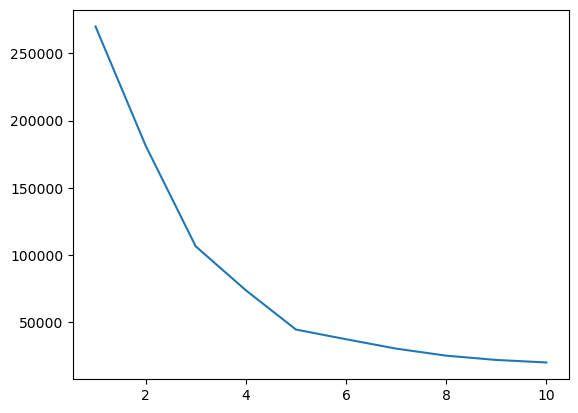

In [104]:
plt.plot(range(1,11),interia_scores2)

From the graph the elbow point, further which the graph will be parallel to x-axis starts at 5

In [106]:
clustering2 = KMeans(n_clusters = 5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Income & Spending Score Cluster (n=5)'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income Cluster (n=6),Income Cluster (n=3),Income & Spending Score Cluster,Income & Spending Score Cluster (n=5)
0,Male,19,15,39,4,5,0,5,2
1,Male,21,15,81,4,5,0,4,3
2,Female,20,16,6,4,5,0,5,2
3,Female,23,16,77,4,5,0,4,3
4,Female,31,17,40,4,5,0,5,2


# Observations (Bivariate)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

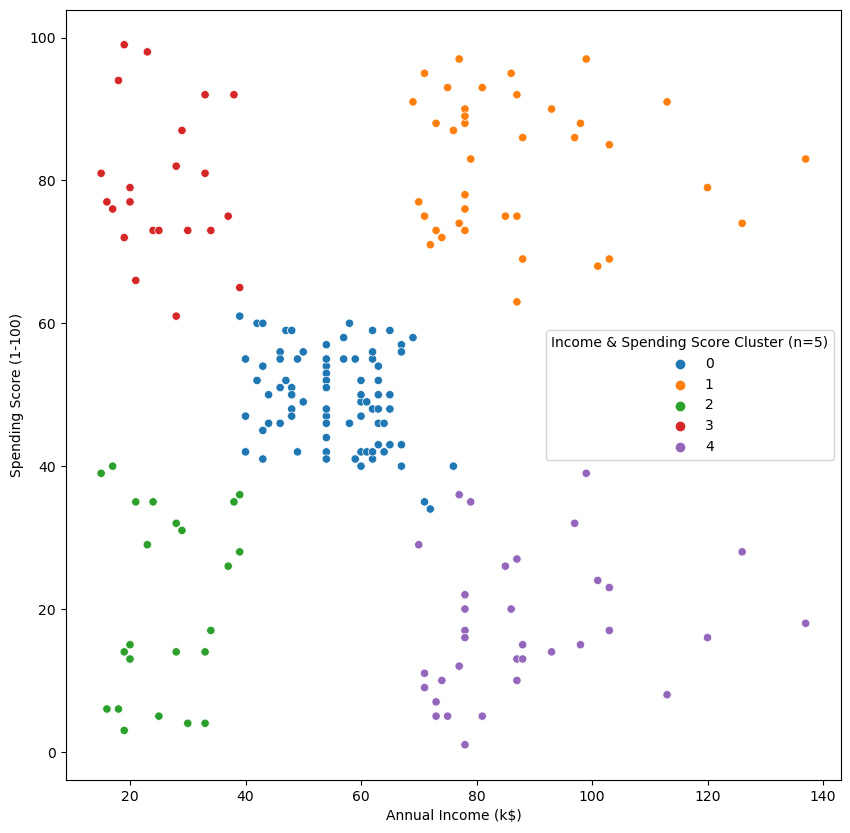

In [116]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Income & Spending Score Cluster (n=5)',palette='tab10')

In [118]:
clustering2.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571]])

In [119]:
centers = pd.DataFrame(clustering2.cluster_centers_)

In [120]:
centers

,0,1
0,55.296296,49.518519
1,86.538462,82.128205
2,26.304348,20.913043
3,25.727273,79.363636
4,88.200000,17.114286


In [124]:
centers.columns = ['x','y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

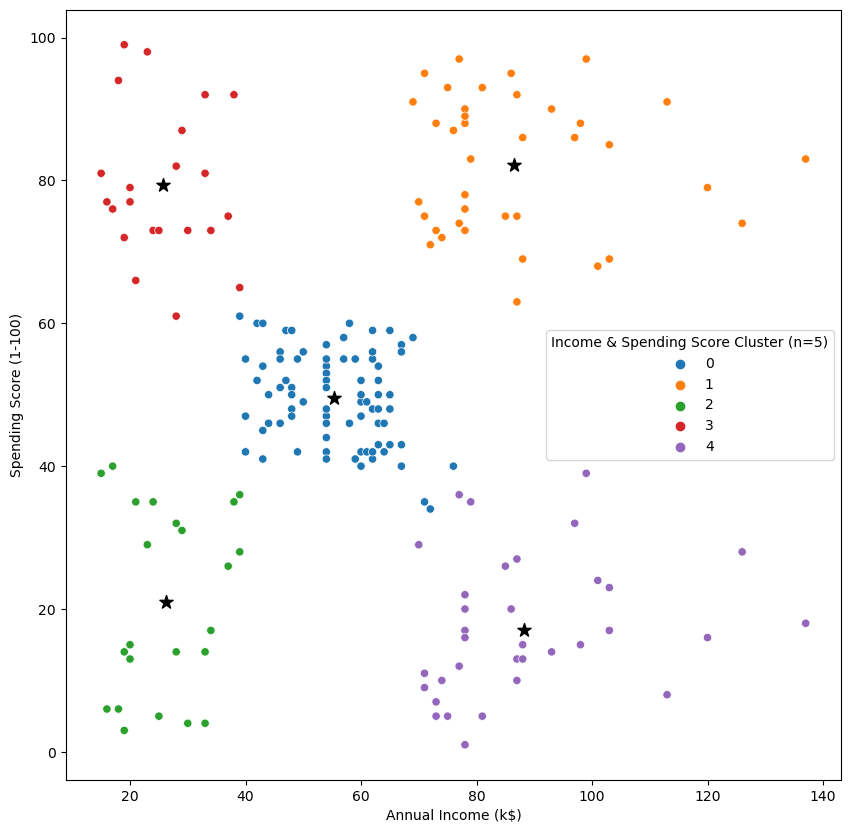

In [125]:
plt.figure(figsize=(10,10))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Income & Spending Score Cluster (n=5)',palette='tab10')

# Observations

In [127]:
pd.crosstab(df['Income & Spending Score Cluster (n=5)'],df['Gender'],normalize = 'index')

Gender,Female,Male
Income & Spending Score Cluster (n=5),,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.608696,0.391304
3,0.590909,0.409091
4,0.457143,0.542857


In cluster 0, 59% are females and 41% are male

In cluster 1, 54% are females and 46% are male

In cluster 2, 61% are females and 39% are male

In cluster 3, 59% are females and 41% are male

In cluster 4, 46% are females and 54% are male

Target cluster

Our target cluster with high spending score and high annual income will be 'Cluster 1'

In [128]:
df.groupby(['Income & Spending Score Cluster (n=5)'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income & Spending Score Cluster (n=5),,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,45.217391,26.304348,20.913043
3,25.272727,25.727273,79.363636
4,41.114286,88.200000,17.114286


From the above, we understand that 'Cluster 1' is our target cluster and it has 54% female and 46% male with average age of 33 years

For Cluster 3, can be a potential group to look into as they have low income but high spending scores. We need to have a closer look into the CustomerID and the amount spend on items that they have purchased and conduct campaigns based on that.

# Multivariate Clustering

1) Preprocessing steps

In [131]:
from sklearn.preprocessing import StandardScaler

2) Initalize

In [141]:
scale = StandardScaler()

3) Take a look into the dataframe to understand which all columns we need to retain to perform multivariate clustering

In [133]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income Cluster (n=6),Income Cluster (n=3),Income & Spending Score Cluster,Income & Spending Score Cluster (n=5)
0,Male,19,15,39,4,5,0,5,2
1,Male,21,15,81,4,5,0,4,3
2,Female,20,16,6,4,5,0,5,2
3,Female,23,16,77,4,5,0,4,3
4,Female,31,17,40,4,5,0,5,2


4) Since 'Gender' is a categorical column and not a numerical column, we have to change that to a numerical column

In [135]:
dff = pd.get_dummies(df)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income Cluster (n=6),Income Cluster (n=3),Income & Spending Score Cluster,Income & Spending Score Cluster (n=5),Gender_Female,Gender_Male
0,19,15,39,4,5,0,5,2,0,1
1,21,15,81,4,5,0,4,3,0,1
2,20,16,6,4,5,0,5,2,1,0
3,23,16,77,4,5,0,4,3,1,0
4,31,17,40,4,5,0,5,2,1,0


In [136]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income Cluster (n=6),Income Cluster (n=3),Income & Spending Score Cluster,Income & Spending Score Cluster (n=5),Gender_Male
0,19,15,39,4,5,0,5,2,1
1,21,15,81,4,5,0,4,3,1
2,20,16,6,4,5,0,5,2,0
3,23,16,77,4,5,0,4,3,0
4,31,17,40,4,5,0,5,2,0


In [137]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Income Cluster (n=6)', 'Income Cluster (n=3)',
       'Income & Spending Score Cluster',
       'Income & Spending Score Cluster (n=5)', 'Gender_Male'],
      dtype='object')

In [138]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]

In [139]:
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


5) Fitting

In [142]:
dff = scale.fit_transform(dff)

In [144]:
dff = pd.DataFrame(scale.fit_transform(dff))

In [145]:
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


In [146]:
interia_scores3 = []
for i in range (1,11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(dff)
    interia_scores3.append(kmeans3.inertia_)

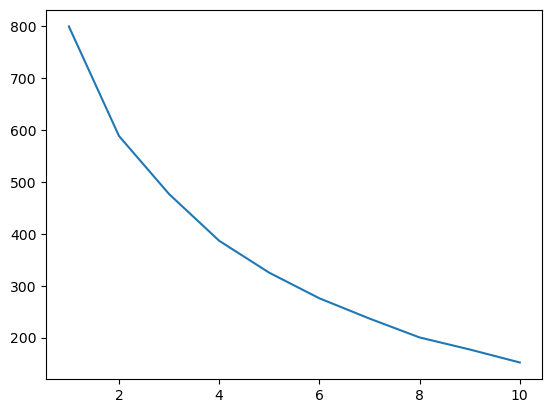

In [147]:
plt.plot(range(1,11),interia_scores3)

# Observations

From the above graph the elbow point is believed to be at the point 4

In [148]:
clustering3 = KMeans(n_clusters = 4)
clustering3.fit(dff)
df['Mul Cluster'] = clustering3.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income Cluster (n=6),Income Cluster (n=3),Income & Spending Score Cluster,Income & Spending Score Cluster (n=5),Mul Cluster
0,Male,19,15,39,4,5,0,5,2,0
1,Male,21,15,81,4,5,0,4,3,0
2,Female,20,16,6,4,5,0,5,2,1
3,Female,23,16,77,4,5,0,4,3,3
4,Female,31,17,40,4,5,0,5,2,3


In [149]:
df['Mul Cluster'].value_counts()

3    57
1    55
2    45
0    43
Name: Mul Cluster, dtype: int64

In [150]:
df.to_csv('Clustering.csv')

# Conclusion

From the KMEANS analysis, we understand that 'Cluster 1' is our target cluster and it has 54% female and 46% male with average age of 33 years with high spending score and high income.

For Cluster 3, it can be a potential group to look into as they have low income but high spending scores. We need to have a closer look into the CustomerID and the amount spend on items that they have purchased and conduct campaigns based on that.